### Community Detection -- Girvan-Newman

In [20]:
# Import Library
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D
from collections import Counter
import networkx as nx 
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community.quality import modularity

%matplotlib inline

In [21]:
# Finding the communities using the Girvan Newman algorithm
communities_iterator = girvan_newman(simplified_subgraph)

best_modularity = -1.0
best_community_sets = None 

# Iterate to find the biggest modularity
for community_sets in communities_iterator:
    current_modularity = modularity(simplified_subgraph, community_sets)
    
    if current_modularity > best_modularity:
        best_modularity = current_modularity
        best_community_sets = community_sets
    else:
        break 

print(f"best_modularity: {best_modularity:.4f}")


node_groups = []
for com in best_community_sets:
    node_groups.append(list(com))

best_modularity: 0.7504


In [22]:
num_communities1 = len(node_groups)  # Total number of communities

print(f"number of communities: {num_communities1}")

number of communities: 36


/var/folders/hw/j0bzl4sj43n1_b7xbnwdzky80000gn/T/ipykernel_13567/21308569.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', num_communities1)


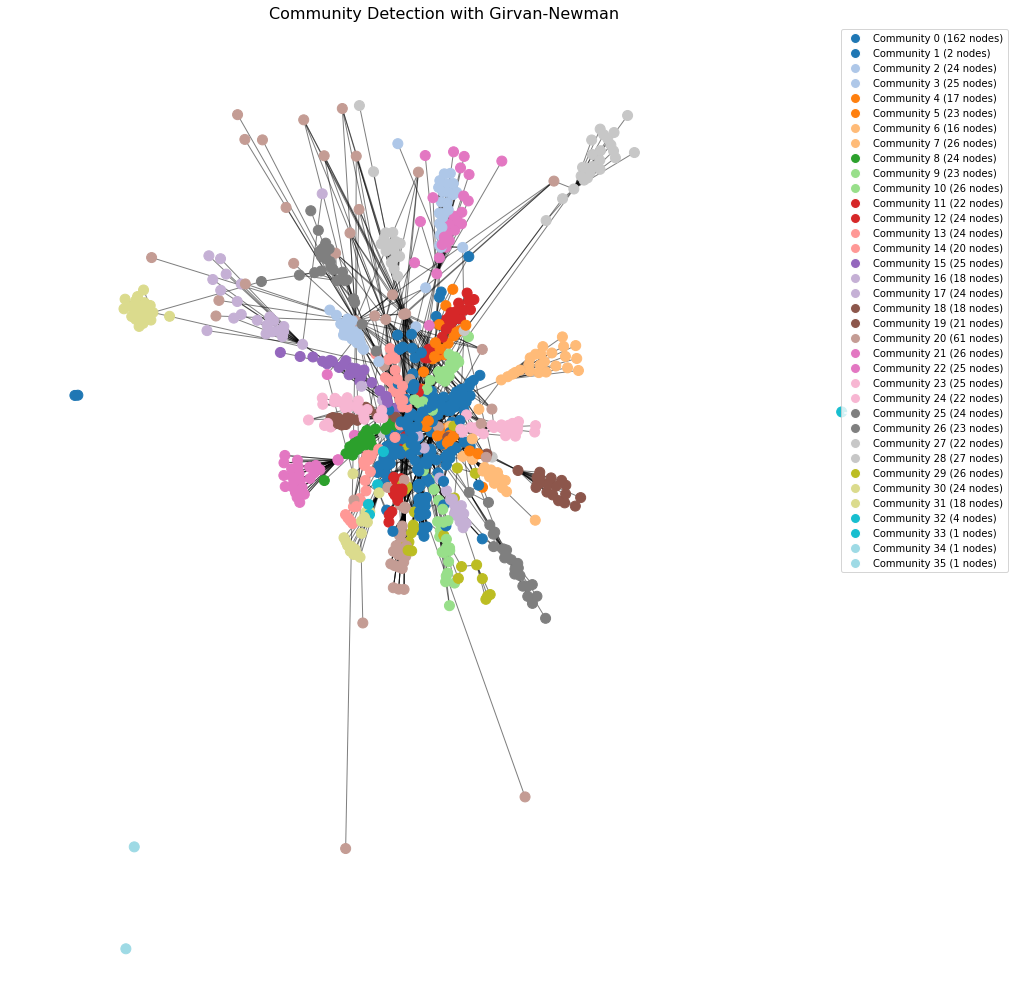

In [23]:
# Visualize Communities with Enhanced Color Differentiation

partition = {}
for community_id, com_nodes in enumerate(node_groups):
    for node in com_nodes:
        partition[node] = community_id
pos = nx.spring_layout(simplified_subgraph, seed=42)

# Choose a qualitative color map with more distinct colors
# 'tab20' provides 20 distinct colors
plt.figure(figsize=(14, 14))
cmap = plt.cm.get_cmap('tab20', num_communities1)

# Assign colors based on community labels
node_colors_community = [partition[node] for node in simplified_subgraph.nodes()]

nx.draw_networkx_nodes(
    simplified_subgraph,
    pos,
    node_size=100,
    node_color=node_colors_community,
    cmap=cmap 
)

nx.draw_networkx_edges(simplified_subgraph, pos, alpha=0.5, edge_color='black')
plt.title("Community Detection with Girvan-Newman", fontsize=16)
plt.axis('off')

# Create a legend for communities
community_counts = Counter(partition.values())
handles = []

for community_id in range(num_communities1):
    # Handle cases where the number of communities exceeds the color map
    color_idx = community_id % cmap.N
    patch = Line2D(
        [0], [0], marker='o', color='w', 
        label=f'Community {community_id} ({community_counts[community_id]} nodes)',
        markerfacecolor=cmap(color_idx), 
        markersize=10
    )
    handles.append(patch)

plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

In [24]:
# Some Other Quantitative Measures of Communities
def internal_density(graph, partition, community_id):
    subgraph = graph.subgraph([node for node, comm in partition.items() if comm == community_id])
    if subgraph.number_of_nodes() < 2:
        return 0.0
        
    return nx.density(subgraph)

print("\nInternal Density per Community: ")
for comm in community_counts:
    density = internal_density(simplified_subgraph, partition, comm)
    print(f"Community {comm} Internal Density: {density:.4f}")
    

print(f"\nModularity of the partition: ")
print(f"best_modularity: {best_modularity:.4f}")

print("\nInter-Community Edges: ")
inter_edges = 0
for u, v in simplified_subgraph.edges():
    if partition[u] != partition[v]:
        inter_edges += 1
print(f"Total Inter-Community Edges: {inter_edges}")


Internal Density per Community: 
Community 0 Internal Density: 0.0360
Community 1 Internal Density: 1.0000
Community 2 Internal Density: 0.1775
Community 3 Internal Density: 0.1467
Community 4 Internal Density: 0.2426
Community 5 Internal Density: 0.0909
Community 6 Internal Density: 0.1250
Community 7 Internal Density: 0.0769
Community 8 Internal Density: 0.1341
Community 9 Internal Density: 0.1818
Community 10 Internal Density: 0.1077
Community 11 Internal Density: 0.0952
Community 12 Internal Density: 0.1087
Community 13 Internal Density: 0.1957
Community 14 Internal Density: 0.1211
Community 15 Internal Density: 0.1467
Community 16 Internal Density: 0.1176
Community 17 Internal Density: 0.0833
Community 18 Internal Density: 0.1503
Community 19 Internal Density: 0.1000
Community 20 Internal Density: 0.1005
Community 21 Internal Density: 0.0769
Community 22 Internal Density: 0.1533
Community 23 Internal Density: 0.2000
Community 24 Internal Density: 0.1515
Community 25 Internal Dens

### Community Detection -- Label Propagation Algorithm (LPA)

In [25]:
# Import Library
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D
from collections import Counter
import networkx as nx 
from networkx.algorithms.community import label_propagation_communities 
from networkx.algorithms.community.quality import modularity as nx_modularity

In [26]:
# Finding the communities using the LPA algorithm
community_sets = label_propagation_communities(simplified_subgraph)

node_groups2 = []
for com in community_sets:
    node_groups2.append(list(com))

num_communities2 = len(node_groups2)  # Total number of communities

print(f"number of communities: {num_communities2}")

number of communities: 72


/var/folders/hw/j0bzl4sj43n1_b7xbnwdzky80000gn/T/ipykernel_13567/2981040428.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', num_communities2)


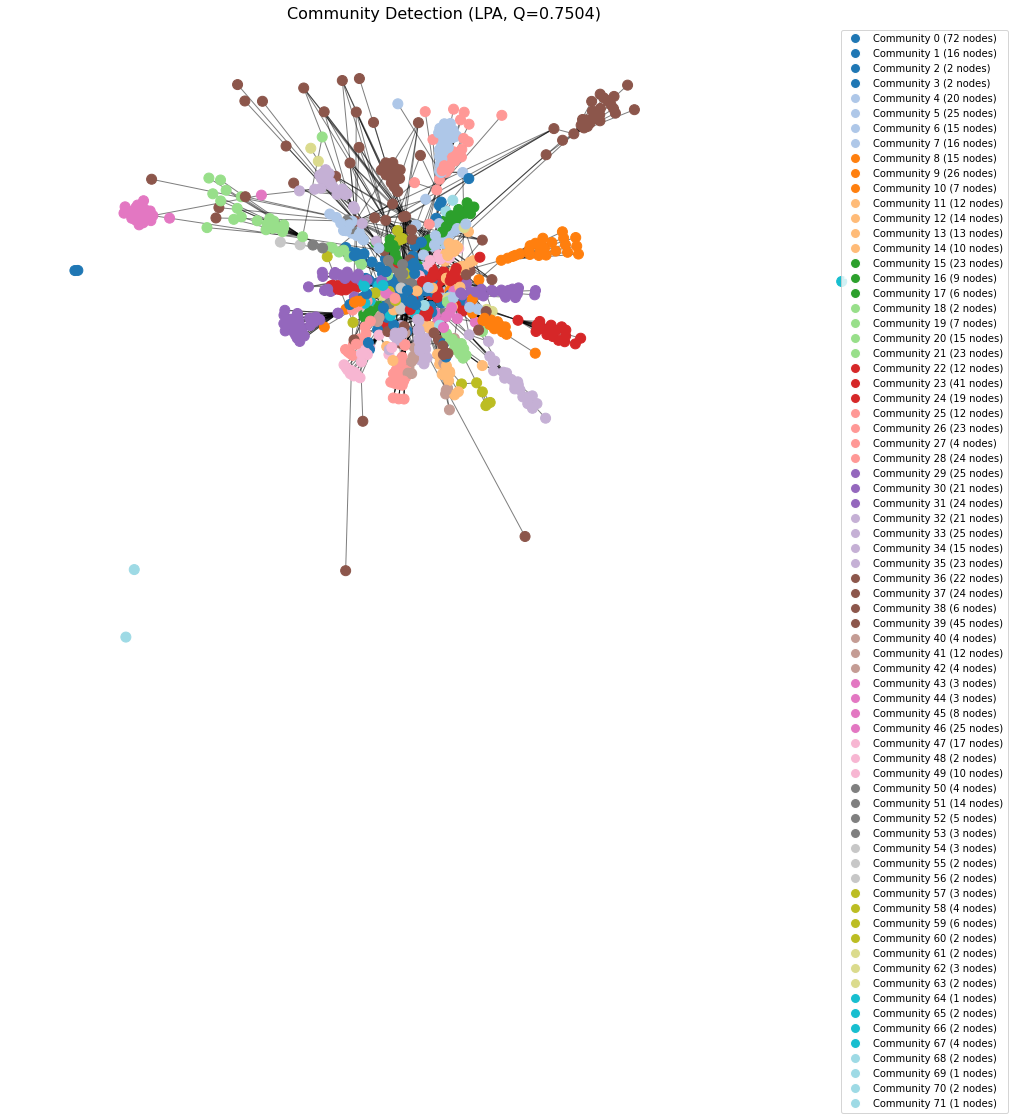

In [27]:
# Visualize Communities with Enhanced Color Differentiation

partition = {}
for community_id, com_nodes in enumerate(node_groups2):
    for node in com_nodes:
        partition[node] = community_id

pos = nx.spring_layout(simplified_subgraph, seed=42)

# Choose a qualitative color map with more distinct colors
# 'tab20' provides 20 distinct colors
plt.figure(figsize=(14, 14))
cmap = plt.cm.get_cmap('tab20', num_communities2)

# Assign colors based on community labels
node_colors_community = [partition[node] for node in simplified_subgraph.nodes()]

nx.draw_networkx_nodes(
    simplified_subgraph,
    pos,
    node_size=100,
    node_color=node_colors_community,
    cmap=cmap
)

nx.draw_networkx_edges(simplified_subgraph, pos, alpha=0.5, edge_color='black')
plt.title(f"Community Detection (LPA, Q={best_modularity:.4f})", fontsize=16)
plt.axis('off')


# Create a legend for communities
community_counts = Counter(partition.values())
handles = []
for community_id in range(num_communities2):
    # Handle cases where the number of communities exceeds the color map
    color_idx = community_id % cmap.N
    patch = Line2D(
        [0], [0], marker='o', color='w', 
        label=f'Community {community_id} ({community_counts[community_id]} nodes)',
        markerfacecolor=cmap(color_idx), 
        markersize=10
    )
    handles.append(patch)

plt.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

In [28]:
# Some Other Quantitative Measures of Communities

print("\nInternal Density per Community (LPA): ")
def internal_density(graph, partition, community_id):
    subgraph = graph.subgraph([node for node, comm in partition.items() if comm == community_id])
    if subgraph.number_of_nodes() < 2:
        return 0.0
    return nx.density(subgraph)

for comm in community_counts:
    density = internal_density(simplified_subgraph, partition, comm)
    print(f"Community {comm} Internal Density: {density:.4f}")

print("\nModularity: ")
best_community_sets_for_modularity = [frozenset(c) for c in node_groups2]
best_modularity = nx_modularity(simplified_subgraph, best_community_sets_for_modularity)
print(f"Modularity of the partition: {best_modularity:.4f}")

print("\nInter-Community Edges: ")
inter_edges = 0
for u, v in simplified_subgraph.edges():
    if partition[u] != partition[v]:
        inter_edges += 1
print(f"Total Inter-Community Edges: {inter_edges}")


Internal Density per Community (LPA): 
Community 0 Internal Density: 0.0376
Community 1 Internal Density: 0.2833
Community 2 Internal Density: 1.0000
Community 3 Internal Density: 1.0000
Community 4 Internal Density: 0.1947
Community 5 Internal Density: 0.1467
Community 6 Internal Density: 0.2952
Community 7 Internal Density: 0.1333
Community 8 Internal Density: 0.1333
Community 9 Internal Density: 0.0769
Community 10 Internal Density: 0.2857
Community 11 Internal Density: 0.4091
Community 12 Internal Density: 0.3187
Community 13 Internal Density: 0.1538
Community 14 Internal Density: 0.4667
Community 15 Internal Density: 0.1146
Community 16 Internal Density: 0.2222
Community 17 Internal Density: 0.3333
Community 18 Internal Density: 1.0000
Community 19 Internal Density: 0.5714
Community 20 Internal Density: 0.1333
Community 21 Internal Density: 0.0870
Community 22 Internal Density: 0.1667
Community 23 Internal Density: 0.0890
Community 24 Internal Density: 0.1053
Community 25 Interna

### Community Detection -- Louvain

In [ ]:
# Import libraries
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
from matplotlib.patches import Patch
import pandas as pd
import numpy as np

In [30]:
# Perform community detection using the Louvain method
partition = community_louvain.best_partition(simplified_subgraph)
print(f"Number of Communities in the subgraph: {len(set(partition.values()))}")

Number of Communities in the subgraph: 36


In [31]:
# community size counter
community_sizes = Counter(partition.values())
print("Community sizes:", community_sizes)

Community sizes: Counter({2: 97, 0: 78, 31: 59, 28: 52, 14: 45, 1: 30, 29: 26, 7: 25, 4: 25, 12: 25, 15: 25, 5: 24, 9: 24, 20: 24, 24: 23, 34: 23, 11: 22, 18: 22, 21: 22, 16: 22, 6: 21, 8: 21, 27: 20, 30: 20, 33: 20, 22: 19, 32: 19, 26: 18, 10: 16, 17: 12, 13: 8, 3: 2, 35: 2, 23: 1, 25: 1, 19: 1})


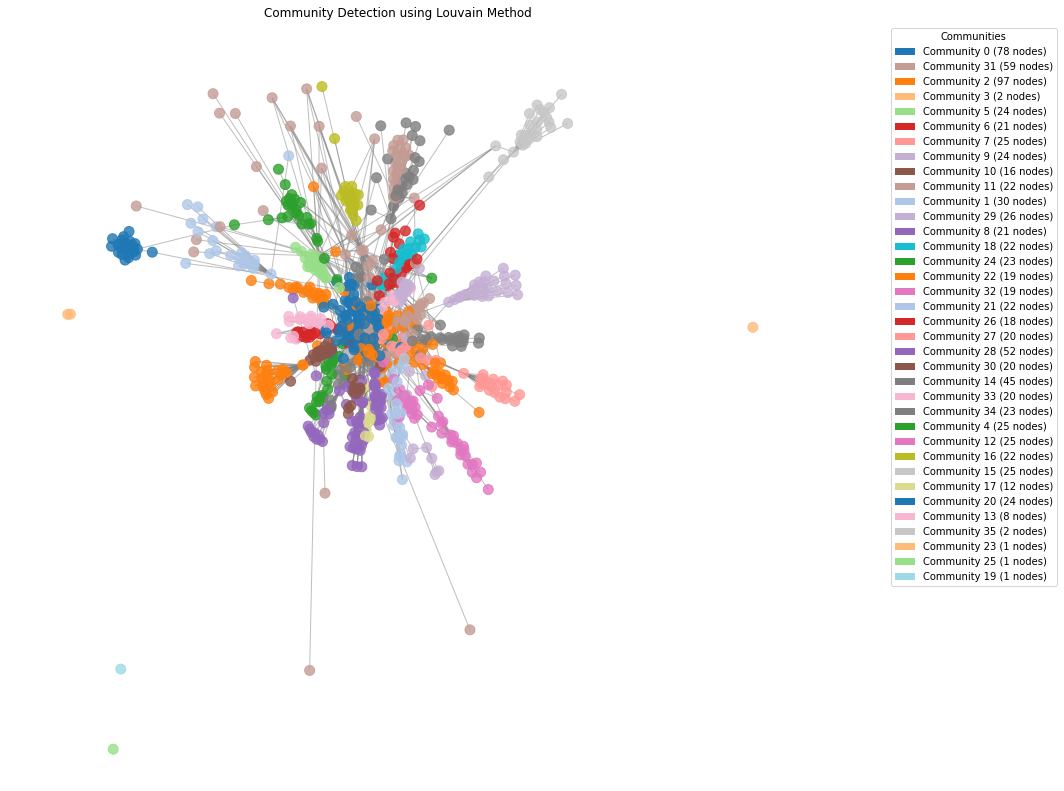

In [32]:
# Visualize the communities
# Assign colors to communities
community_colors = {}
for node, comm in partition.items():
    if comm not in community_colors:
        community_colors[comm] = plt.cm.tab20(comm % 20)
node_colors = [community_colors[partition[node]] for node in simplified_subgraph.nodes()]
pos = nx.spring_layout(simplified_subgraph, seed=42)
plt.figure(figsize=(14, 14))
nx.draw_networkx_nodes(
    simplified_subgraph,
    pos,
    node_color=node_colors,
    node_size=100,
    alpha=0.8
)
nx.draw_networkx_edges(
    simplified_subgraph,
    pos,
    edge_color='gray',
    alpha=0.5
)
plt.title("Community Detection using Louvain Method")
plt.axis('off')

# Add legend for communities
legend_handles = []
for comm, color in community_colors.items():
    node_count = sum(
        1 for n in simplified_subgraph.nodes()
        if partition[n] == comm
    )
    legend_handles.append(
        Patch(
            facecolor=color,
            edgecolor='none',
            label=f"Community {comm} ({node_count} nodes)"
        )
    )
plt.legend(
    handles=legend_handles,
    title="Communities",
    loc='upper right',
    bbox_to_anchor=(1.35, 1.0),
    frameon=True
)

plt.show()

In [33]:
# modularity score
modularity_score = community_louvain.modularity(partition, simplified_subgraph)
print(f"Modularity Score: {modularity_score:.4f}")

Modularity Score: 0.8275


In [34]:
# internal density calculation per community
def internal_density(G, partition):
    density_dict = {}
    for comm in set(partition.values()):
        nodes_in_comm = [node for node in G.nodes() if partition[node] == comm]
        subgraph = G.subgraph(nodes_in_comm)
        num_nodes = subgraph.number_of_nodes()
        num_edges = subgraph.number_of_edges()
        if num_nodes > 1:
            possible_edges = num_nodes * (num_nodes - 1) / 2
            density = num_edges / possible_edges
        else:
            density = 0
        density_dict[comm] = density
    return density_dict
density_dict = internal_density(simplified_subgraph, partition)
print("Internal Density per Community:")
for comm, density in density_dict.items():
    print(f"Community {comm}: Density = {density:.4f}")

Internal Density per Community:
Community 0: Density = 0.0426
Community 1: Density = 0.1218
Community 2: Density = 0.0391
Community 3: Density = 1.0000
Community 4: Density = 0.1200
Community 5: Density = 0.1775
Community 6: Density = 0.1571
Community 7: Density = 0.0833
Community 8: Density = 0.0952
Community 9: Density = 0.0833
Community 10: Density = 0.1750
Community 11: Density = 0.2121
Community 12: Density = 0.1233
Community 13: Density = 0.4286
Community 14: Density = 0.0515
Community 15: Density = 0.0800
Community 16: Density = 0.2381
Community 17: Density = 0.1818
Community 18: Density = 0.1039
Community 19: Density = 0.0000
Community 20: Density = 0.0833
Community 21: Density = 0.0909
Community 22: Density = 0.1696
Community 23: Density = 0.0000
Community 24: Density = 0.0949
Community 25: Density = 0.0000
Community 26: Density = 0.1438
Community 27: Density = 0.1000
Community 28: Density = 0.1486
Community 29: Density = 0.0831
Community 30: Density = 0.1000
Community 31: Den

In [35]:
# Other quantitative measures
# total internal edges and overall internal density
def community_internal_stats(G, partition):
    communities = {}
    
    # Group nodes by community
    for node, comm in partition.items():
        communities.setdefault(comm, []).append(node)
    
    total_internal_edges = 0
    total_possible_edges = 0
    
    for comm, nodes in communities.items():
        subgraph = G.subgraph(nodes)
        e = subgraph.number_of_edges()
        n = len(nodes)
        
        total_internal_edges += e
        total_possible_edges += n * (n - 1) / 2  # nC2
    
    overall_density = (
        total_internal_edges / total_possible_edges 
        if total_possible_edges > 0 else 0
    )
    
    return total_internal_edges, overall_density

internal_edges, overall_density = community_internal_stats(simplified_subgraph, partition)

print(f"Total Internal Edges: {internal_edges}")
print(f"Internal Density of Communities(Overall): {overall_density:.4f}")


Total Internal Edges: 1424
Internal Density of Communities(Overall): 0.0809


### Community Detection  -- Leiden

In [36]:
# repeat the process of Louvain using Leiden method
import leidenalg
import igraph as ig
from matplotlib.lines import Line2D

In [37]:
# Load the subgraph from pickle file
with open('subgraph.pkl', 'rb') as f:
    subgraph = pickle.load(f)
# Convert NetworkX graph to igraph
igraph_subgraph = ig.Graph.from_networkx(subgraph)
# Perform community detection using the Leiden method
leiden_partition = leidenalg.find_partition(igraph_subgraph, leidenalg.ModularityVertexPartition)
print(f"Number of Communities in the subgraph (Leiden): {len(leiden_partition)}")
# community size counter
leiden_community_sizes = [len(comm) for comm in leiden_partition]
print("Community sizes (Leiden):", leiden_community_sizes)

Number of Communities in the subgraph (Leiden): 33
Community sizes (Leiden): [97, 58, 49, 48, 44, 40, 37, 27, 26, 26, 26, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 23, 22, 22, 21, 19, 18, 17, 2, 1, 1, 1]


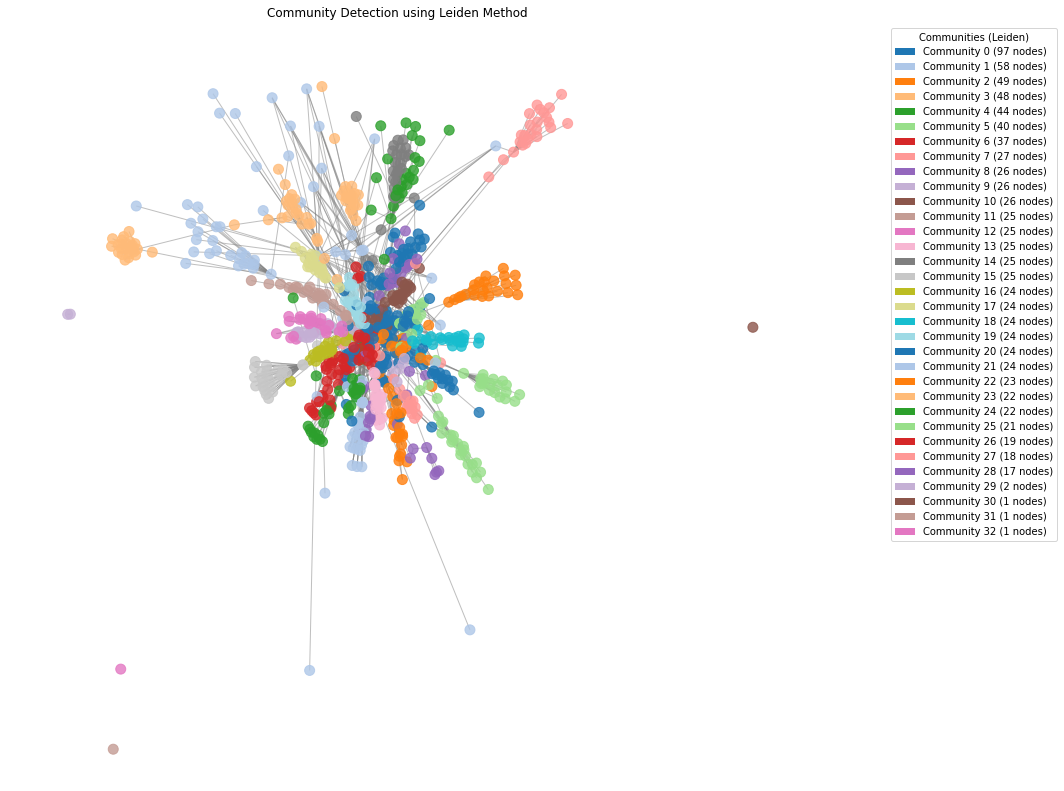

In [38]:
# Visualize the communities detected by Leiden
# Assign colors to communities
leiden_community_colors = {}
for comm_index, comm in enumerate(leiden_partition):
    for node in comm:
        leiden_community_colors[node] = plt.cm.tab20(comm_index % 20)
leiden_node_colors = [leiden_community_colors[node.index] for node in igraph_subgraph.vs]
pos = nx.spring_layout(subgraph, seed=42)
plt.figure(figsize=(14, 14))
nx.draw_networkx_nodes(
    subgraph,
    pos,
    node_color=leiden_node_colors,
    node_size=100,
    alpha=0.8
)
nx.draw_networkx_edges(
    subgraph,
    pos,
    edge_color='gray',
    alpha=0.5
)
plt.title("Community Detection using Leiden Method")
plt.axis('off')
# Add legend for communities
leiden_legend_handles = []
for comm_index, comm in enumerate(leiden_partition):
    node_count = len(comm)
    color = plt.cm.tab20(comm_index % 20)
    leiden_legend_handles.append(
        Patch(
            facecolor=color,
            edgecolor='none',
            label=f"Community {comm_index} ({node_count} nodes)"
        )
    )
plt.legend(
    handles=leiden_legend_handles,
    title="Communities (Leiden)",
    loc='upper right',
    bbox_to_anchor=(1.35, 1.0),
    frameon=True
)
plt.show()

In [39]:
# Modularity score for Leiden
leiden_modularity_score = leiden_partition.modularity
print(f"Leiden Modularity Score: {leiden_modularity_score:.4f}")

Leiden Modularity Score: 0.7881


In [40]:
# Internal density calculation per community for Leiden
def leiden_internal_density(igraph_subgraph, leiden_partition):
    density_dict = {}
    for comm_index, comm in enumerate(leiden_partition):
        subgraph = igraph_subgraph.subgraph(comm)
        num_nodes = subgraph.vcount()
        num_edges = subgraph.ecount()
        if num_nodes > 1:
            possible_edges = num_nodes * (num_nodes - 1) / 2
            density = num_edges / possible_edges
        else:
            density = 0
        density_dict[comm_index] = density
    return density_dict
leiden_density_dict = leiden_internal_density(igraph_subgraph, leiden_partition)
print("Internal Density per Community (Leiden):")
for comm_index, density in leiden_density_dict.items():
    print(f"Community {comm_index}: Density = {density:.4f}")

Internal Density per Community (Leiden):
Community 0: Density = 0.0455
Community 1: Density = 0.1059
Community 2: Density = 0.0417
Community 3: Density = 0.0523
Community 4: Density = 0.0455
Community 5: Density = 0.1038
Community 6: Density = 0.0676
Community 7: Density = 0.0769
Community 8: Density = 0.1046
Community 9: Density = 0.1108
Community 10: Density = 0.1077
Community 11: Density = 0.1467
Community 12: Density = 0.2000
Community 13: Density = 0.3467
Community 14: Density = 0.1467
Community 15: Density = 0.1533
Community 16: Density = 0.1341
Community 17: Density = 0.1775
Community 18: Density = 0.1558
Community 19: Density = 0.1957
Community 20: Density = 0.1087
Community 21: Density = 0.0833
Community 22: Density = 0.1818
Community 23: Density = 0.2381
Community 24: Density = 0.0952
Community 25: Density = 0.1000
Community 26: Density = 0.2398
Community 27: Density = 0.1176
Community 28: Density = 0.2426
Community 29: Density = 1.0000
Community 30: Density = 0.0000
Communit

In [41]:
# Other quantitative measures for Leiden
def leiden_community_internal_stats(igraph_subgraph, leiden_partition):
    communities = {}
    
    # Group nodes by community
    for comm_index, comm in enumerate(leiden_partition):
        communities[comm_index] = comm
    
    total_internal_edges = 0
    total_possible_edges = 0
    
    for comm_index, nodes in communities.items():
        subgraph = igraph_subgraph.subgraph(nodes)
        e = subgraph.ecount()
        n = subgraph.vcount()
        
        total_internal_edges += e
        total_possible_edges += n * (n - 1) / 2  # nC2
    
    overall_density = (
        total_internal_edges / total_possible_edges 
        if total_possible_edges > 0 else 0
    )
    
    return total_internal_edges, overall_density
internal_edges_leiden, overall_density_leiden = leiden_community_internal_stats(igraph_subgraph, leiden_partition)
print(f"Total Internal Edges (Leiden): {internal_edges_leiden}")
print(f"Internal Density of Communities (Overall, Leiden): {overall_density_leiden:.4f}")

Total Internal Edges (Leiden): 1567
Internal Density of Communities (Overall, Leiden): 0.0929


In [ ]:
# Mapping Leiden partition back to original node names
leiden_partition_node2comm = {}

for comm_id, vertices in enumerate(leiden_partition):
    for v in vertices:
        node = igraph_subgraph.vs[v]["_nx_name"]
        leiden_partition_node2comm[node] = comm_id


### Community Detection -- Persona Profiling Analysis

In [ ]:
# Analysing Community Composition (using Leiden partition)
comm_stats = []

for comm in set(leiden_partition_node2comm.values()):
    nodes = [n for n in simplified_subgraph.nodes() if leiden_partition_node2comm[n] == comm]
    types = [simplified_subgraph.nodes[n]['node_type'] for n in nodes]

    products = [n for n in nodes if simplified_subgraph.nodes[n]['node_type'] == 'product']
    customers = [n for n in nodes if simplified_subgraph.nodes[n]['node_type'] == 'customer']

    comm_stats.append({
        'community': comm,
        'num_nodes': len(nodes),
        'num_products': len(products),
        'num_customers': len(customers),
        'pct_products': len(products) / len(nodes) if len(nodes) > 0 else 0,
        'avg_degree': np.mean([simplified_subgraph.degree(n) for n in nodes]) if len(nodes) > 0 else 0,
    })

pd.DataFrame(comm_stats).sort_values('num_nodes', ascending=False)


,community,num_nodes,num_products,num_customers,pct_products,avg_degree
0,0,97,62,35,0.639175,6.721649
1,1,58,9,49,0.155172,7.120690
2,2,49,23,26,0.469388,2.163265
3,3,48,13,35,0.270833,2.520833
4,4,44,3,41,0.068182,2.204545
5,5,40,13,27,0.325000,4.925000
6,6,37,15,22,0.405405,3.054054
7,7,27,2,25,0.074074,2.296296
8,8,26,20,6,0.769231,2.769231
9,9,26,14,12,0.538462,3.153846


### Conclusion: Community Overall Structure 
1. The subgraph has no giant clusters(largest community contains 97 nodes), indicating a multi-centric, multi-cluster structure.

2. Most of the communities range from 20-30 nodes 
    - community structure is dispersed with pronounced modularity.

3. pct(%)_products: varies from 0.06 to 0.9+ 
    - significant differences between communities in “product-heavy vs. customer-heavy" approaches
    - 3 major structural archetypes:
    - 3.1 product-heavy(% > 0.5): 少量客户连接到较多产品
        - 产品节点数量高 --> 类目深度强 & 用户少 --> 行为相对集中
    - 3.2 customer-heavy(% < 0.5): 较多客户集中在相对较少的产品周围
        - 顾客数量高 & 行为集中度可能高（如果粉丝型）也可能低（如果比价型）
        - Community behavior is determined by “user behavior patterns,” not by product structure
    - 3.3 mixed balanced cluster: 客户和产品数量相近

4. avg_degree: extreme variation 
    - some communities(>5) are tightly knit while others(<=3) exhibit extremely loose structures
    - 4.1 high-density: stable structure 
        - products: reviewed by lots of users
        - customers: reviewing on products frequently/ posting high quality reviews(high numbers of "votes" & "helpful")
    - 4.2 low-density: loose structure & diverse community connection --> tends to be "explorative users" or "first-time customers"
        - products: 小众/冷门
        - customers: low engagements/ newcomers/ browswers

/var/folders/hw/j0bzl4sj43n1_b7xbnwdzky80000gn/T/ipykernel_13567/1586842825.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, s=sizes, c=color, alpha=0.85, edgecolors='black', linewidth=0.5)


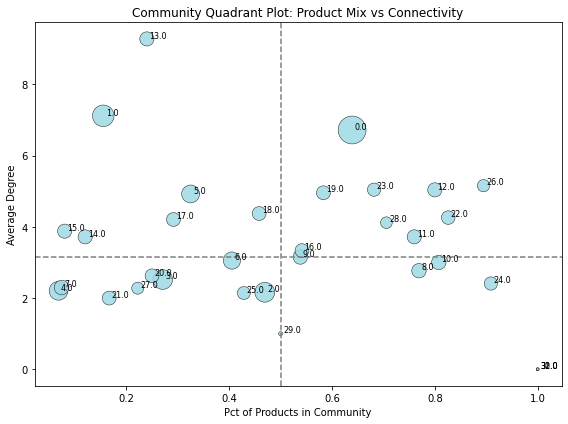

Horizontal split (avg_degree median): 3.154
Vertical split (pct_products median): 0.500


In [ ]:
comm_df = pd.DataFrame(comm_stats).sort_values('num_nodes', ascending=False)
x = comm_df['pct_products']
y = comm_df['avg_degree']

# median lines
x_mid = x.median()
y_mid = y.median()
# Color map for communities
color = plt.cm.tab20(comm_index % 37)
sizes = comm_df['num_nodes'] * 8

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=sizes, c=color, alpha=0.85, edgecolors='black', linewidth=0.5)
# Annotate each point with community number
for _, row in comm_df.iterrows():
    plt.text(
        row['pct_products'] + 0.005,
        row['avg_degree'] + 0.03,
        str(row['community']),
        fontsize=8
    )

plt.axvline(x=x_mid, linestyle='--', color='gray')
plt.axhline(y=y_mid, linestyle='--', color='gray')
plt.xlabel('Pct of Products in Community')
plt.ylabel('Average Degree')
plt.title('Community Quadrant Plot: Product Mix vs Connectivity')
plt.tight_layout()
plt.show()

print(f"Horizontal split (avg_degree median): {y_mid:.3f}")
print(f"Vertical split (pct_products median): {x_mid:.3f}")

### Insights(Persona profiling)
#### Profiling is just a reasonable speculation of the community profiles, may need more data to further validate.

1. Categorial Core Shoppers(Category deep divers)品类中心深度用户: Community 0(97 nodes)
    - product-heavy + high density community
    - large amount of products & few customers but highly active
    - category-driven cluster(repetitive purchase behaviours)
    - user profiling:
        - loyal buyers with highly concentrated interests in specific categories
        - long-term customers, not one-time buyers
        - a small set of highly active customers engage with a large set of closely related products
        - a major product category with strong co-purchase or co-review behaviour
2. Fan clusters/Star-product buyers粉丝群体/爆款/趋势导向消费者: Community 1(58 nodes)
    - customer-heavy + high-engagement & active community
    - low pct_product: number of customers far exceeds number of products
    - high avg_degree: customers engage intensely, leaving reviews and browsing on the same groups of products frequently
    - strong community-driven behaviour, possibly a fandom cluster or viral product segment
    - user profiling:
        - power influencers
        - high-volume trend followers clustered around a few blockbuster products
        - frequently review on popular contents
        - driven by popularity signals rather than category depth
3. Casual shoppers(low intent but browse widely)泛兴趣顾客: Community 2(49 nodes)
    - mixed balance + low-engagement & low-inner-bonding community
    - balanced ratio of products and customers: users interact with a variety of items that are not strongly related to each other.
    - users profiling: 
        - non-specialized, low-commitment browsing behavior
        - general-purpose shoppers who browse across multiple categories
        - customers exploring different types of products
4. Occasional Buyers/Comparison shoppers偶尔购买者/货比三家客: Community 3(48 nodes) 
    - customer-heavy + low-engagement community
    - low interations & commitments, but sharing overlapping interests
    - users profiling:
        - new customers entering a specific category for the first time
        - occasional buyers with focused but shallow engagement
        - potentially “one-time demand”
        - customers evaluating a few similar products (substitutes) before making a choice
5. Browsers/Potential customers潜在客户: Community 8(26 nodes)
    - product-heavy + low-density community
    - customers browsing various products with low correlations
    - user profiling:
        - random visitors
        - no specific browsing direction and minor engagement
        - early stage of purchasing initiation

### Targeted Strategies/Recommender Systems
<b> 1. Categorial Core Shoppers(Category deep divers): Community 0 </b>
- In-category deep recommendations
- Cross-sell complementary products


<b> 2. Fan clusters/Star-product buyers: Community 1 </b>
- Limited effectiveness of personalized recommendations
- Promotion on trending products/boosting viral items


<b> 3. Casual shoppers(low intent but browse widely): Community 2 </b>
- Explorable, wide-coverage entry products
- Help users to enter/spark interests on a category, not deepen their understanding of certain specific category


<b> 4. Occasional Buyers/Comparison shoppers: Community 3 


   & Browsers/Potential customers: Community 8 </b>
- not suitable for deep personalization/content-based
- Introduction recommendation of diverse products --> capture interests
- guided navigation

